<h1>ANEXO III. Selección de Variables<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Carga-de-módulos-y-dataset" data-toc-modified-id="Carga-de-módulos-y-dataset-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Carga de módulos y dataset</a></span></li><li><span><a href="#Carga-Librerías" data-toc-modified-id="Carga-Librerías-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Carga Librerías</a></span></li><li><span><a href="#Carga-datos-Train-y-Test-Depurados" data-toc-modified-id="Carga-datos-Train-y-Test-Depurados-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Carga datos Train y Test Depurados</a></span></li><li><span><a href="#Feature-Selection" data-toc-modified-id="Feature-Selection-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Feature Selection</a></span><ul class="toc-item"><li><span><a href="#Filter-Methods" data-toc-modified-id="Filter-Methods-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Filter Methods</a></span><ul class="toc-item"><li><span><a href="#Correlación" data-toc-modified-id="Correlación-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Correlación</a></span></li></ul></li><li><span><a href="#Wrapper-Methods" data-toc-modified-id="Wrapper-Methods-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Wrapper Methods</a></span><ul class="toc-item"><li><span><a href="#RFE.-Linear-Estimator" data-toc-modified-id="RFE.-Linear-Estimator-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>RFE. Linear Estimator</a></span></li><li><span><a href="#RFE.-Random-Forest-Estimator" data-toc-modified-id="RFE.-Random-Forest-Estimator-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>RFE. Random Forest Estimator</a></span></li><li><span><a href="#Conclusiones" data-toc-modified-id="Conclusiones-4.2.3"><span class="toc-item-num">4.2.3&nbsp;&nbsp;</span>Conclusiones</a></span></li></ul></li><li><span><a href="#Embedded-Methods" data-toc-modified-id="Embedded-Methods-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Embedded Methods</a></span><ul class="toc-item"><li><span><a href="#Lasso-Regression" data-toc-modified-id="Lasso-Regression-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>Lasso Regression</a></span></li><li><span><a href="#Ridge-Regression" data-toc-modified-id="Ridge-Regression-4.3.2"><span class="toc-item-num">4.3.2&nbsp;&nbsp;</span>Ridge Regression</a></span></li><li><span><a href="#Conclusiones" data-toc-modified-id="Conclusiones-4.3.3"><span class="toc-item-num">4.3.3&nbsp;&nbsp;</span>Conclusiones</a></span></li></ul></li></ul></li><li><span><a href="#Conclusiones-generales" data-toc-modified-id="Conclusiones-generales-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Conclusiones generales</a></span></li><li><span><a href="#Guardado-Resultados" data-toc-modified-id="Guardado-Resultados-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Guardado Resultados</a></span><ul class="toc-item"><li><span><a href="#Guardado-wrapper-data-sets" data-toc-modified-id="Guardado-wrapper-data-sets-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Guardado wrapper data sets</a></span></li><li><span><a href="#Guardado-embedded-data-sets" data-toc-modified-id="Guardado-embedded-data-sets-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Guardado embedded data sets</a></span></li></ul></li></ul></div>

* *******

**En este anexo se aplican diferentes algoritmos y métodos para la determinación de las variables que, de acuerdo al método y, dentro de las virtudes y limitaciones en cada un de ellos, se consideran más importantes en el sentido de obtener mayor potencia predictiva.** 

* *******

# Carga de módulos y dataset

Se muestran a continuación las versiones tanto del OS usado así como de Python usados en el presente notebook.

In [1]:
!lsb_release -a

No LSB modules are available.
Distributor ID:	Ubuntu
Description:	Ubuntu 19.04
Release:	19.04
Codename:	disco


In [2]:
!uname -r

5.0.0-25-generic


In [3]:
import os
import sys
print("Python version: {}". format(sys.version))

Python version: 3.7.3 (default, Mar 27 2019, 22:11:17) 
[GCC 7.3.0]


# Carga Librerías

En primer lugar se cargan los módulos de python que se consideran necesarios para esta etapa de depuración. En una primera etapa se cargan los módulos clásicos de Análisis de Datos:

* **numpy**
* **pandas**
* **matplotlib**
* **seaborn**

Se importa además el módulo con las funcionalidades creadas ad-hoc, denominado **`pipeLine`** para la depuración del detaset.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import json
import dill
#dill.load_session('notebook_env.db')

from ames import pipeLine

sns.set(style="whitegrid")

import warnings
warnings.simplefilter('ignore')

# Carga datos Train y Test Depurados

Se cargan los archivos csv que continen los datos train y test suministrados.

In [73]:
train_prep = pd.read_csv('X_train.csv', sep = ',')
test_prep = pd.read_csv('X_test.csv', sep = ',')

Por razones de comodidad se separa y elimina la variable objetivo/target del data set.

In [74]:
y = train_prep.SalePrice.copy()
X = train_prep.drop("SalePrice", axis=1).copy()

train_prep['SalePrice'] = y.values.copy()

Se muestran los primeros registros del set de datos train.

In [7]:
X.head()

,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,...,BsmtUnfSF_miss,TotalBsmtSF_miss,BsmtFullBath_miss,BsmtHalfBath_miss,KitchenQual_miss,Functional_miss,GarageCars_miss,GarageYrBlt_miss,GarageArea_miss,SaleType_miss
0,0.0,0.0,6.0,4.0,1.046258,0.896833,0.529034,1.0,2.0,1.0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0.0,5.0,7.0,0.154764,-0.395604,-0.567016,2.0,2.0,1.0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,0.0,6.0,4.0,0.980221,0.848965,0.338903,1.0,2.0,1.0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,0.0,6.0,4.0,-1.859351,-0.682812,-0.567016,2.0,2.0,2.0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,0.0,7.0,4.0,0.947203,0.753229,1.390216,1.0,2.0,1.0,...,0,0,0,0,0,0,0,0,0,0


También se cargan los nombres de las variables de acuerdo a la tipología obtenida en el Anexo II.

In [8]:
# caga tipoVariables.json
with open('tipoVariables.json') as file:
    data = json.load(file)

nominales = data['nominales']
ordinales = data['ordinales']
numericas = data['numericas']

# Feature Selection

Los métodos a aplicar para la selección de variables son los siguientes. Se exponen de acuerdo a la clasificaciń clásica encontrada en cualquier bibliografía sobre Data Science y Machine Learning. Las ventajas en la aplicación de métodos de selección de variables se resume en que:

* **Se reduce el overfitting**
* **Mejora la precisión**
* **Se reduce el tiempo de entrenamiento**

Los métodos a emplear son:

1 **Filter Methods**
   * Correlación
    
2 **Wrapper Method**
   * Backward Elimination
   * RFE (Recursive Feature Elimination)

3 **Embedded Method**
   * Lasso Regression
   * Ridge Regression

Inicialmente se crea un objeto de la clase **pipeLine**.

In [9]:
#Se creo objeto de clase pipeLine
DF = pipeLine(train_prep, nominales, ordinales, numericas, target='SalePrice')

len(DF.df.columns)

195

## Filter Methods

En este método se aplican medidas estadísticas para la obtención de scores en cada variable y ,de acuerdo a estos, se ordenan las variables explicativas. Se considera que las variables que más poder predictivo aportan son aquellas que ocupan una mejor posición en dicho ranking. Estos métodos suelen ser univariantes por lo que, cada uno de ellos, es considerado de forma independiente o considerando conjuntamente la variable target. 

Aquí se utilizará como método filter la correlación de las variables explicativas con el target.

### Correlación

Se aplica el método de clase creado al efecto.

In [59]:
#Pearson Correlation
DF.featureCorrel(nominales + ordinales + numericas, 'SalePrice', threshold=0.50)

,Pearson Corr
TotalSF,0.849916
OverallQual,0.817185
Total_sqr_footage,0.745338
Avg_NeigSalePrice,0.738395
GrLivArea,0.725169
GarageCars,0.680625
Total_Bathrooms,0.673011
GarageArea,0.650888
TotalBsmtSF_norm,0.631228
1stFlrSF,0.6178


El resultado del método es una tabla con las variables más correlacionadas con el target cuando se filtran los valores absolutos de correlación por el valor umbral de 0.55.

## Wrapper Methods

Se utilizan estimadores para asignar scores a subconjuntos de variables de acuerdo a su poder de predicción. Es necesario definir cómo realizar la búsqueda en el espacio de todos los posibles subconjuntos de variables, cómo evaluar el error de predicción para guiar la búsqueda y, finalmente, qué estimador usar.

Se usará el método denominado **RFE (Recursive feature elimination)** y se plantearán dos estimadores:

* **Regresión lineal**
* **Random Forest**

Como método de remuestreo se usará validación cruzada con 10 folds.

### RFE. Linear Estimator

Se aplica el método de clase creado al efecto.

In [30]:
_, _, rango_lr = DF.featureRFE('LR', cv=10)
np.array(rango_lr)

array({1: ['OverallQual', 'OverallCond', 'YearBuilt', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'KitchenQual', 'Functional', 'GarageArea', 'TotalSF', 'Total_sqr_footage', 'MSSubClass_160', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Alley_Pave', 'LotConfig_CulDSac', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NPkVill', 'Neighborhood_NridgHt', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker', 'Condition1_Norm', 'Condition1_PosN', 'Condition1_RRAn', 'RoofMatl_CompShg', 'RoofMatl_Tar&Grv', 'MasVnrType_Stone', 'Foundation_PConc', 'Heating_GasW', 'CentralAir_Y', 'SaleType_ConLD', 'SaleCondition_Normal', 'SaleCondition_Partial', 'hasgarage_1', 'MasVnrArea_miss', 'TotalBsmtSF_miss'], 2: ['MasVnrType_miss'], 3: ['MSSubClass_30'], 4: ['Total_porch_sf'], 5: ['GarageType_None'], 6: ['GarageYrBlt_miss'], 7: ['ScreenPorch'], 8: ['WoodDeckSF'], 9: ['OpenPorchSF'

La ejecución anterior muestra que las **20 variables más importantes, entre otras,** según este criterio son:

* **OverallQual**, 
* **OverallCond**, 
* **YearBuilt**, 
* **BsmtFinSF1**, 
* **BsmtFinSF2**, 
* **BsmtUnfSF**, 
* **1stFlrSF**, 
* **2ndFlrSF**, 
* **GrLivArea**, 
* **KitchenQual**, 
* **Functional**, 
* **GarageArea**, 
* **TotalSF**, 
* **Total_sqr_footage**, 
* **MSSubClass_160**
* **MSZoning_FV,**
* **MSZoning_RH,**
* **MSZoning_RL,**
* **MSZoning_RM,**
* **Alley_Pave**

### RFE. Random Forest Estimator

Se aplica el método de clase creado al efecto.

In [39]:
_, _, rango_rf = DF.featureRFE('RF', cv=5)
np.array(rango_rf)

array({1: ['LotShape', 'LandSlope', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'HeatingQC', 'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'Fence', 'MoSold', 'YrSold', 'TotalSF', 'Total_sqr_footage', 'Total_Bathrooms', 'Total_porch_sf', 'Avg_NeigSalePrice', 'LotFrontage_norm', 'LotArea_norm', 'MasVnrArea_norm', 'BsmtFinSF1_norm', 'TotalBsmtSF_norm', 'WoodDeckSF_norm', 'OpenPorchSF_norm', 'MSSubClass_30', 'MSSubClass_50', 'MSSubClass_60', 'MSSubClass_90', 'MSSubClass_120', 'MSZoning_RL', 'MSZoning_RM', 'LandContour

La ejecución anterior muestra que las **20 variables más importantes, entre otras,** según este criterio son:

* **LotShape**
* **LandSlope**
* **OverallQual**
* **OverallCond**
* **YearBuilt**
* **YearRemodAdd**
* **MasVnrArea**
* **ExterQual**
* **ExterCond**
* **BsmtQual**
* **BsmtCond**
* **BsmtExposure**
* **BsmtFinType1**
* **BsmtFinSF1**
* **BsmtFinType2**
* **BsmtFinSF2**
* **BsmtUnfSF**
* **HeatingQC**
* **Electrical**
* **1stFlrSF**

### Conclusiones

Se aprecia cómo ambos métodos presentan bastantes similitudes en cuanto a las variables que son consideradas importantes de forma independiente. Precisamente por eso, se toma la decisión de fundir las variables que seleccionan ambos métodos y mantener el resultado. 

Los siguientes sets contienen las variables que cada uno de los métodos considera imortantes.

In [42]:
lr_set = {value for key in rango_lr.keys() for value in rango_lr[key]}

rf_set = {value for key in rango_rf.keys() for value in rango_rf[key]}

Se procede a obtener la union de ambos conjuntos y así obtener el listado con las variables más importantes. 

In [63]:
wrapp = list(lr_set | rf_set)

In [64]:
np.array(wrapp), len(wrapp)

(array(['TotalBsmtSF_norm', 'GarageType_Attchd', 'Exterior2nd_Wd Sdng',
        'RoofStyle_Hip', 'MSSubClass_90', 'Exterior1st_VinylSd',
        'GrLivArea', 'Neighborhood_Timber', 'Alley_None', 'Heating_GasW',
        'LandContour_Lvl', 'HalfBath', 'BsmtCond', 'GarageType_Detchd',
        'hasRemodeled_1', 'Alley_Pave', 'Neighborhood_StoneBr',
        'WoodDeckSF', 'FireplaceQu', 'LotArea_norm',
        'Neighborhood_NPkVill', 'BsmtFinType2', 'GarageType_BuiltIn',
        'MoSold', 'FullBath', 'BsmtExposure', 'Neighborhood_NAmes',
        'Foundation_PConc', 'RoofMatl_Tar&Grv', 'GarageQual',
        'MSSubClassMap_1-story', 'SaleType_ConLD', 'BsmtFinType1', 'Fence',
        'TotalSF', 'hasporch_1', 'OverallCond', 'BsmtFinSF1',
        'hasgarage_1', 'MSSubClass_160', 'MasVnrType_BrkFace',
        'Exterior1st_Plywood', 'WoodDeckSF_norm', 'TotRmsAbvGrd',
        'ExterQual', 'LotConfig_CulDSac', 'HeatingQC', 'GarageCars',
        '2ndFlrSF', 'MSSubClass_60', 'Condition1_PosN', 'Central

## Embedded Methods

Los métodos Embedded seleccionan las variables que mejor contribuyen a la precisión al mismo tiempo en que el correspondiente modelo es construido. Los métodos más importantes son los de regularización o penalización en los cuales se introducen restricciones adicionales en el proceso de optimización del algoritmo sesgando el modelo intencionalmente con vistas a reducir la complejidad del mismo.

Se plantearán los siguientes métodos de regularización:

* **Lasso Regression**
* **Ridge Regression**

Como método de remuestreo se usará validación cruzada con 10 folds.

### Lasso Regression

Se aplica el método de clase creado al efecto.

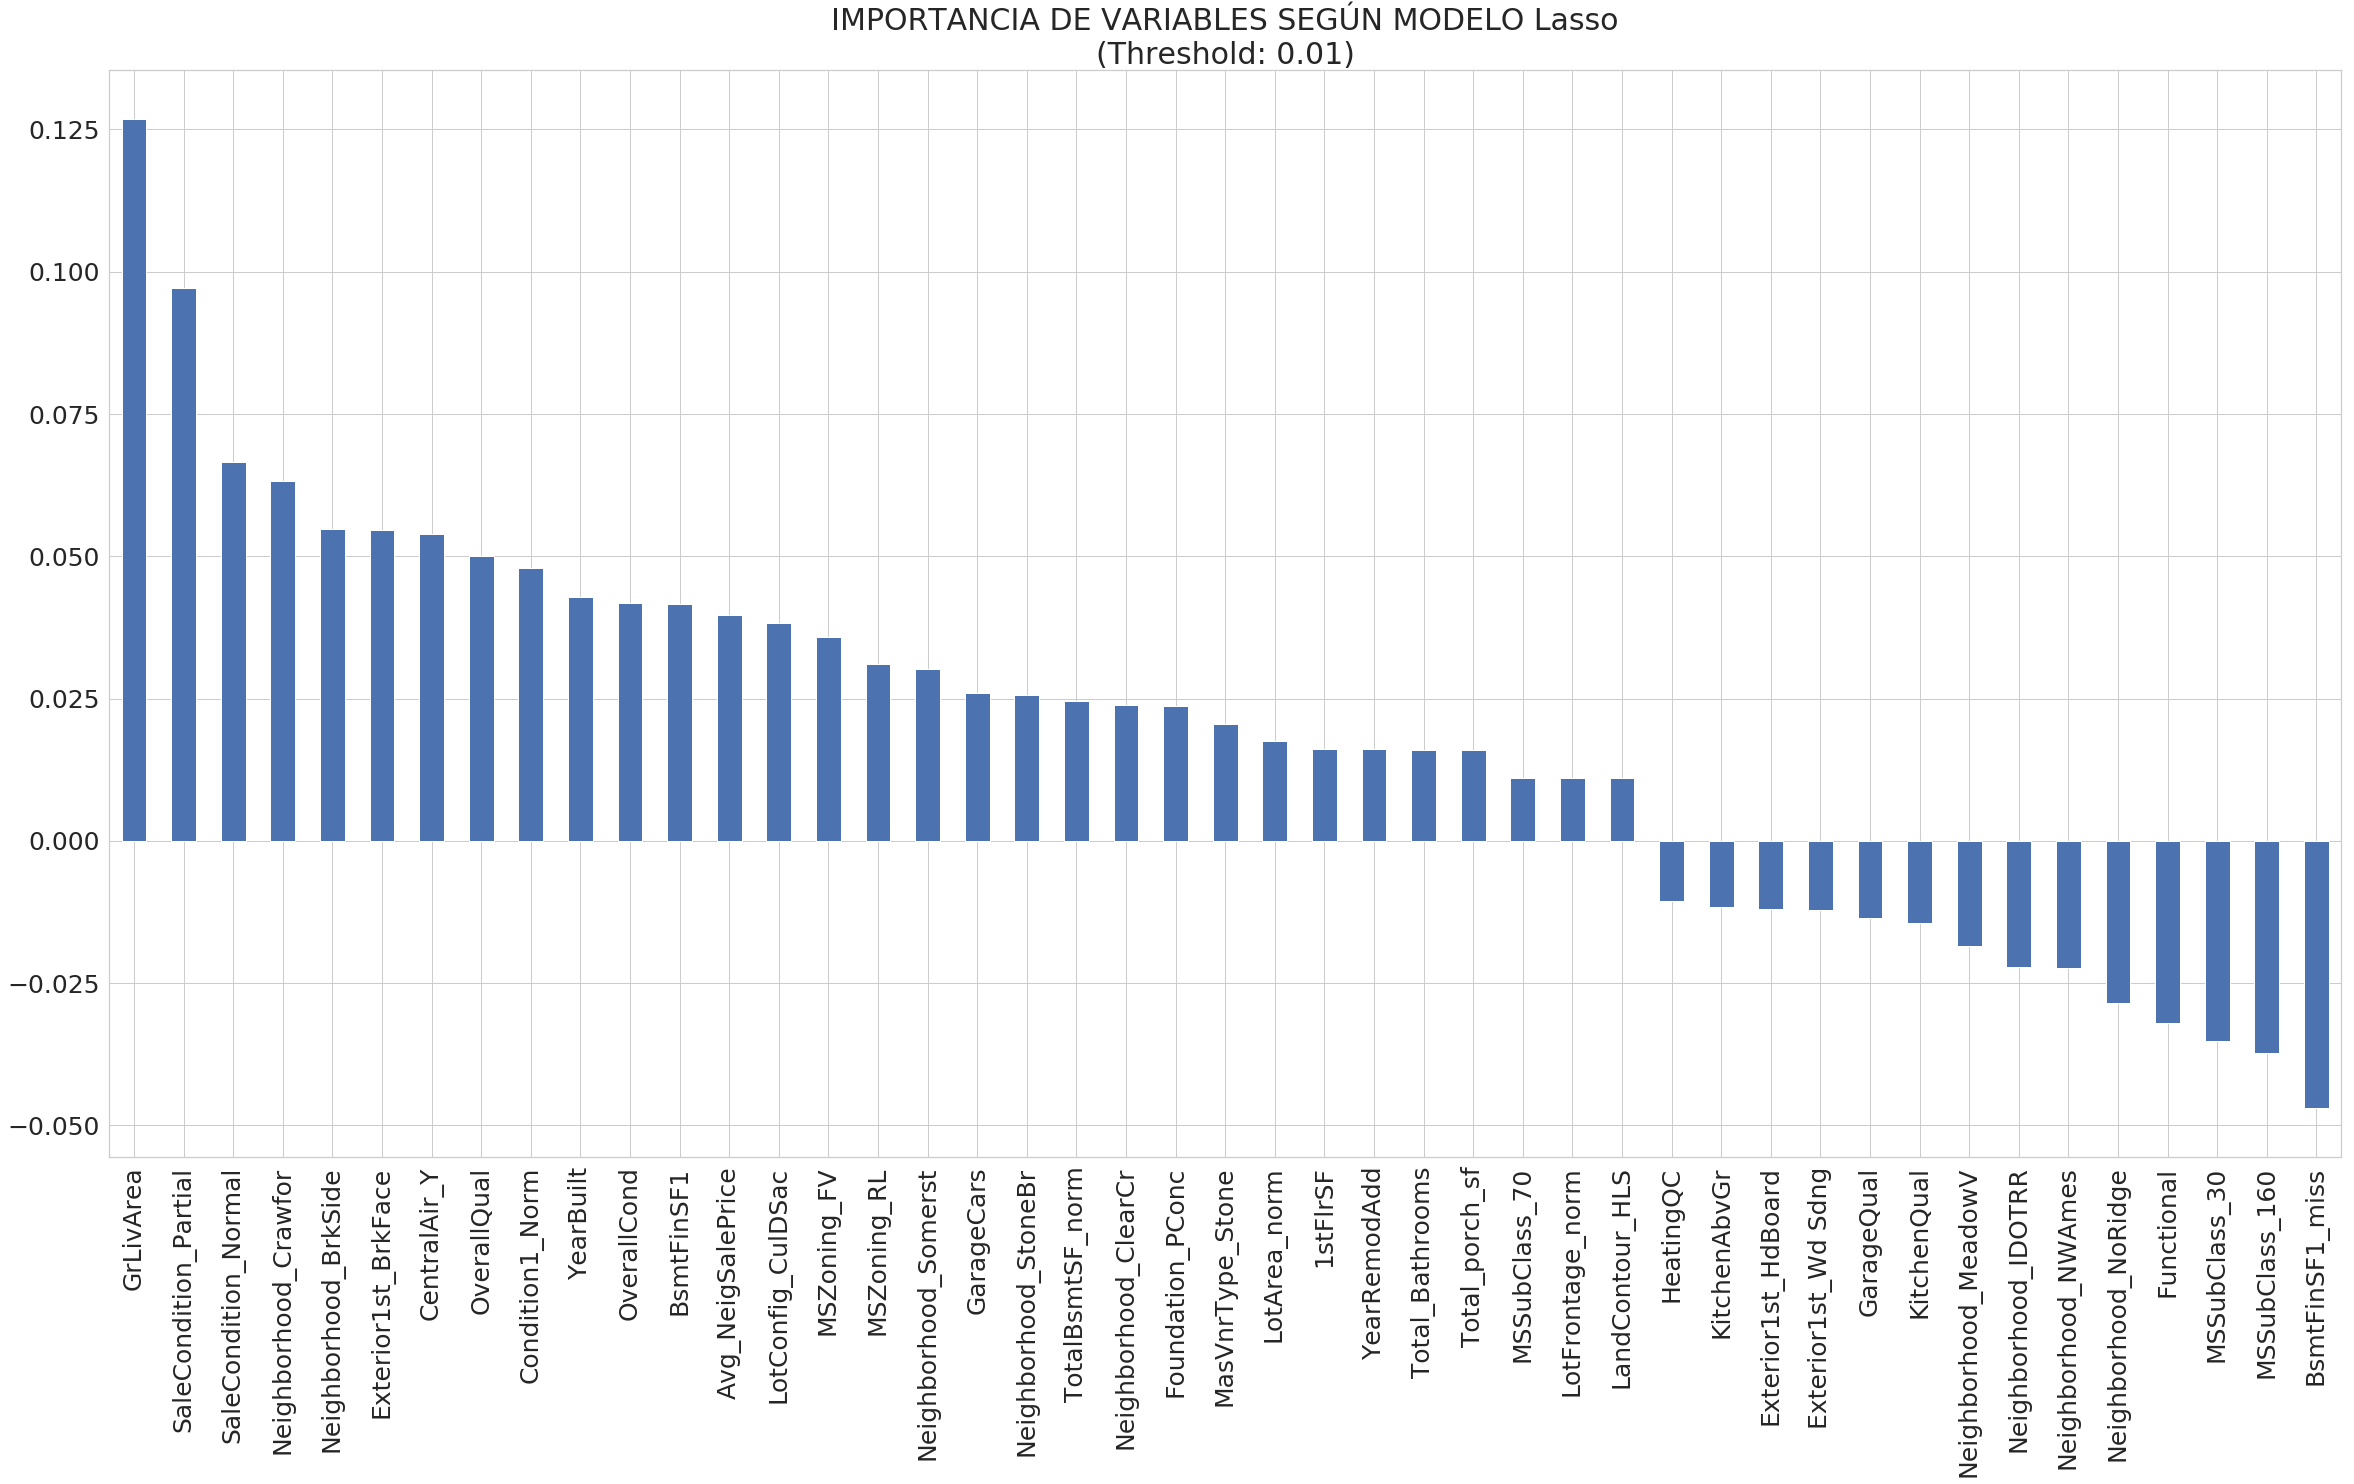

In [35]:
lasso = DF.featureEmb('Lasso', Threshold = 0.01, cv=5, table=True)

En forma de tabla se tiene que las variables más importantes resultantes son:

In [37]:
lasso

,coef
GrLivArea,0.126818
SaleCondition_Partial,0.0971766
SaleCondition_Normal,0.0665045
Neighborhood_Crawfor,0.0632581
Neighborhood_BrkSide,0.0548373
Exterior1st_BrkFace,0.0546898
CentralAir_Y,0.0539125
OverallQual,0.0500104
Condition1_Norm,0.0479434
YearBuilt,0.042863


### Ridge Regression

Se aplica el método de clase creado al efecto.

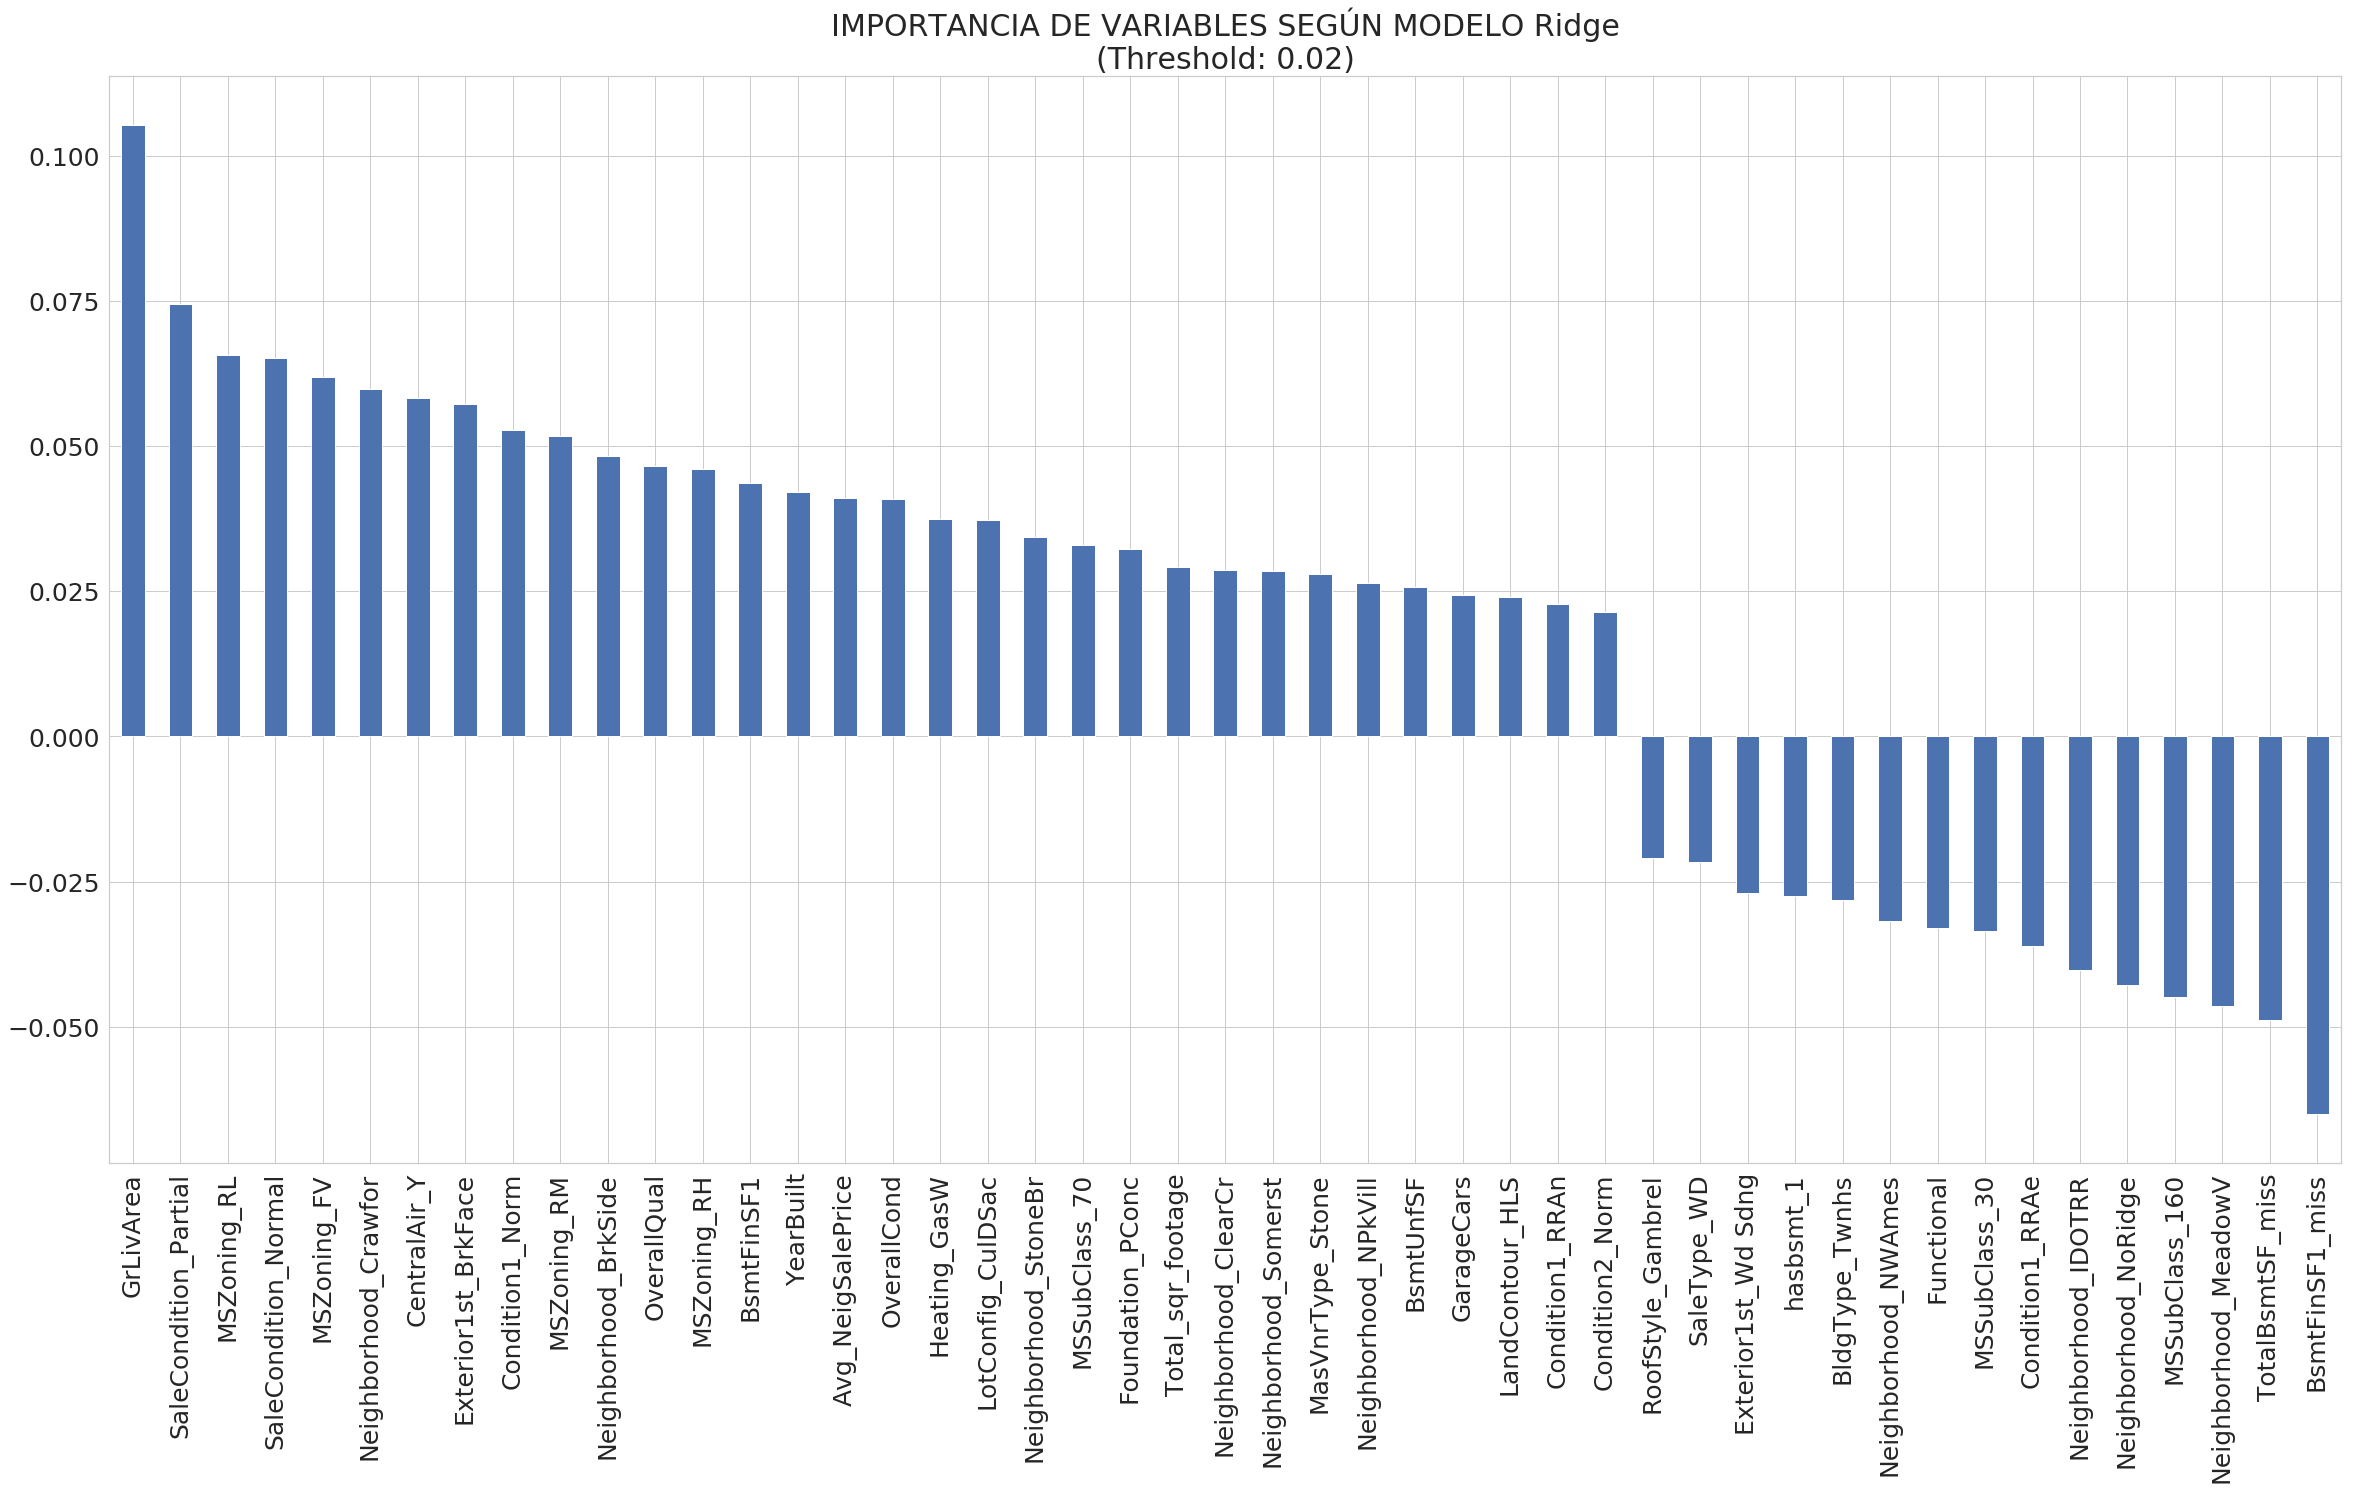

In [54]:
ridge = DF.featureEmb('Ridge', Threshold = 0.02, cv=5, table=True)

En forma de tabla se tiene que las variables más importantes resultantes son:

In [56]:
ridge

,coef
GrLivArea,0.105307
SaleCondition_Partial,0.0745678
MSZoning_RL,0.0657663
SaleCondition_Normal,0.0652288
MSZoning_FV,0.0619559
Neighborhood_Crawfor,0.0599287
CentralAir_Y,0.0582642
Exterior1st_BrkFace,0.057277
Condition1_Norm,0.0528313
MSZoning_RM,0.0517773


### Conclusiones

Se aprecia cómo ambos métodos presentan bastantes similitudes en cuanto a las variables que son consideradas importantes de forma independiente. Precisamente por eso, se toma la decisión de fundir las variables que seleccionan ambos métodos y mantener el resultado. 

Los siguientes sets contienen las variables que cada uno de los métodos considera imortantes.

In [48]:
lasso_set = set(lasso.index)

ridge_set = set(ridge.index)

Se procede a obtener la union de ambos conjuntos y así obtener el listado con las variables más importantes. 

In [67]:
embedd = list(lasso_set | ridge_set)

In [68]:
np.array(embedd), len(embedd)

(array(['MSSubClass_70', 'MSZoning_RM', 'TotalBsmtSF_norm', 'YearRemodAdd',
        'Exterior1st_Wd Sdng', 'hasbsmt_1', 'LotFrontage_norm',
        'BsmtFinSF1_miss', 'Neighborhood_NWAmes', 'Neighborhood_BrkSide',
        'GrLivArea', 'MSSubClass_30', 'Condition1_RRAe',
        'Neighborhood_IDOTRR', 'Heating_GasW', 'Neighborhood_Somerst',
        'TotalBsmtSF_miss', 'YearBuilt', 'Neighborhood_NoRidge',
        'BldgType_Twnhs', 'Avg_NeigSalePrice', 'Neighborhood_StoneBr',
        '1stFlrSF', 'LotArea_norm', 'Exterior1st_BrkFace',
        'SaleCondition_Partial', 'Neighborhood_NPkVill', 'OverallQual',
        'Neighborhood_Crawfor', 'Condition1_Norm', 'MasVnrType_Stone',
        'GarageQual', 'Foundation_PConc', 'Exterior1st_HdBoard',
        'OverallCond', 'BsmtFinSF1', 'MSSubClass_160', 'Total_sqr_footage',
        'SaleCondition_Normal', 'Functional', 'KitchenAbvGr',
        'MSZoning_RH', 'LotConfig_CulDSac', 'HeatingQC', 'Condition2_Norm',
        'LandContour_HLS', 'GarageCars', 

# Conclusiones generales

En vista de lo anterior, se guardan ambos datasets, para la aplicación de los algoritmos venideros sobre ellos. 

# Guardado Resultados

En este punto se guardan los conjuntos de variables obtenidos por los métodos Wrapper y Embedded en sendos diccionarios de python que, a su vez, seran llevados a disco en forma de archivo json.

In [70]:
variablesImp = {'wrapper': wrapp, 'embedded': embedd}

with open('variablesImp.json', 'w') as file:
    json.dump(variablesImp, file, indent=4)

## Guardado wrapper data sets

In [94]:
# guardado de train
pd.concat([y, train_prep[variablesImp['wrapper']]], axis=1).\
          to_csv("X_train_wrapp.csv", sep=',', index=False)

In [95]:
# guardado de test
pd.concat([test_prep[variablesImp['wrapper']]], axis=1).\
          to_csv("X_test_wrapp.csv", sep=',', index=False)

## Guardado embedded data sets

In [96]:
# guardado de train
pd.concat([y, train_prep[variablesImp['embedded']]], axis=1).\
          to_csv("X_train_embedd.csv", sep=',', index=False)

In [97]:
# guardado de test
pd.concat([test_prep[variablesImp['embedded']]], axis=1).\
          to_csv("X_test_embedd.csv", sep=',', index=False)